# 12. Regression and Correlation
This notebook contains all the solutions to the twelfth chapter of Principles of Statistics (1965) by MG Bulmer

---

Set local environment

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exercise 12.1
From the data in Table 22 on p. 210 calculate $\sum x_i$, $\sum y_i$, $\sum x_i^2$, $\sum y_i^2$ and $\sum x_i y_i$ and hence find the equation of the best-fitting straight line. [In evaluating sums like $\sum x_i$ it should be remembered that each dose level occurs five times] Reproduce Fig. 30 and plot this line on it.

In [2]:
df = pd.DataFrame({'half':[8,1,1,3,1],'one':[5,6,9,7,4], 'two':[13,7,12,10,11],
                   'four':[17,14,14,19,13], 'eight':[17,17,20,18,15]})
df

,half,one,two,four,eight
0,8,5,13,17,17
1,1,6,7,14,17
2,1,9,12,14,20
3,3,7,10,19,18
4,1,4,11,13,15


This question is super interesting because the author does not tell the reader which independent variable to use. At the beginning of the chapter, Bulmer states that when $y$ is plotted against $\log_2(x)$, there is an approximately linear relationship.

For educational purposes, I will solve the problem twice:
1. $E(Y|X) = \alpha + \beta X$
2. $E(Y|X) = \alpha + \beta \log{X}$

As we will see, the first model has a really poor fit because $X$ and $Y$ do not linearly related. The second model, $\log{X}$ and $Y$, will fit much better.

Prior to solving though, it is much more convenient to reshape the data from its current for (`df`) to arrays.

Recall that
- $a = \bar{y} - b\bar{x}$
- $b = \frac{\sum x_i y_i - n\bar{x}\bar{y}}{\sum x_i^2 - n\bar{x}}$

### 12.1.1 $Y$ on $X$ (bad fit)

In [3]:
# Dependent variable as array
y = df.values.reshape(1, -1)[0]

# Independent variable as array
X = np.tile([0.5, 1, 2, 4, 8], 5)

# Sum of x_i
print('Sum of x_i:', X.sum())

# Sum of y_i
print('Sum of y_i:', y.sum())

# Sum of x_i^2
print('Sum of x_i^2:', np.power(X, 2).sum())

# Sum of y_i^2
print('Sum of y_i^2:', np.power(y, 2).sum())

# Sum of x_i^2 * y_i^2
print('Sum of x_i^2 * y_i^2:', (np.power(X, 2) * np.power(y, 2)).sum())

Sum of x_i: 77.5
Sum of y_i: 262
Sum of x_i^2: 426.25
Sum of y_i^2: 3604
Sum of x_i^2 * y_i^2: 119662.0


a = 4.88 
b= 1.81


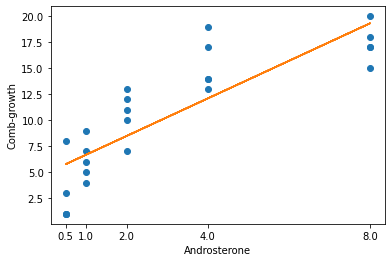

In [4]:
# Calculate coefficients by hand
n = len(X)
b = ((X * y).sum() - (X.sum() * y.mean())) / (np.power(X, 2).sum() - n * X.mean()**2)
a = y.mean() - b * X.mean()

# Print results
print('a =', round(a, 2), '\nb=', round(b, 2))

### Plot
# Data points
plt.scatter(X, y)
# Estimated line
plt.plot(X, a + b * X, color='C1', ls='--')
# Styling
plt.xlabel('Androsterone')
plt.ylabel('Comb-growth')
plt.xticks(ticks=[0.5,1,2,4,8])
plt.show()

### 12.1.2 $Y$ on $\log_2{X}$
This time around, we will not calculate $a$ and $b$ by hand. We will use `sklearn`.

Later though, when we have to make inferences about the estimates, we will use `statsmodels`.

First, we have to transform $X$.

a = 4.88 
b= 1.81


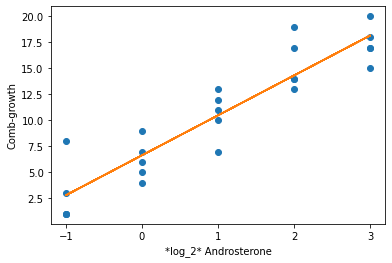

In [5]:
# log_2(X)
X = np.log2(X)

# Initialize linear model from sklearn
lm = LinearRegression()

# Fit model to data
lm.fit(X.reshape(-1, 1), y)

# Print results
print('a =', round(a, 2), '\nb=', round(b, 2))

### Plot
# Data points
plt.scatter(X, y)
# Estimated line
plt.plot(X, lm.predict(X.reshape(-1, 1)), color='C1')
# Styling
plt.xlabel('*log_2* Androsterone')
plt.ylabel('Comb-growth')
plt.xticks(ticks=np.log2([0.5,1,2,4,8]))
plt.show()

In order to gain a sense of the benefit of transforming $X$ into $\log{X}$, we calculate the mean squared error of both models.

In [6]:
print('MSE of Y on X:\n   ',
      mean_squared_error(y, a + b * X))
print('MSE of Y on log_2(X):\n   ',
      mean_squared_error(y, lm.predict(X.reshape(-1, 1))))

MSE of Y on X:
    27.491669152503174
MSE of Y on log_2(X):
    4.838399999999999


As predicted by the author, the transformed variable has a much better fit on the growth of capons (dependent variable).

# Exercise 12.2
Find the residual sum of squares in the above example (a) directly by squaring the deviations of the observed and predicted points, (b) from the formula on p.213.